- 머신러닝을 개발, 배포, 관리하는 프로세스와 툴을 결합한 접근방식
  - 문제 정의 및 데이터 수집
  - 데이터 준비
  - 모델 학습
  - 모델 검증
  - 모델 배포
  - 모델 모니터링 및 업데이트
- 환경설정
  - 버전관리 : Git
  - 컨테이너화 : Docker
  - 워크플로우 자동화 : MLFlow, Kubeflow
  - 클라우드 서비스: AWS   
- 데이터 전처리
  - 결측값 처리
  - 이상치 탐지
  - 데이터 스케일링 및 인코딩

학습용 데이터
  - iris : 다중 분류
  - wine : 다중 분류
  - bostern housing : 회귀 , 사이킷런에 없다(흑인비하관련 이슈)
  - breast cancer : 이진 분류

In [6]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target

In [7]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
# 데이터 분류
X = data.drop('target', axis=1)
y = data['target']
# 학습용 검증용
# random_state=42 --> seed 값을 고정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [29]:
# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # X_train 데이터기반 스케일링 규칙 적용 하고 변환
X_test_scaled = scaler.transform(X_test)  # X_train 기준으로 적용

In [30]:
# 모델 학습
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [31]:
# 검증
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test_scaled)
# 정확도
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9666666666666667


In [32]:
# 학습용 데이터는 클래스 불균형이 없는 이상적인 데이터
data.target.value_counts()

,count
target,
0,50
1,50
2,50


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91         6
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [34]:
# precision     정밀도  모델이 예측한 양성클래스중에서 실제로 맞춘 비율
# recall        재현률  실제 양성클래스중에서 모델이 맞춘 비율

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[11,  0,  0],
       [ 0,  5,  1],
       [ 0,  0, 13]])

In [54]:
model.predict([X_test_scaled[0]])

array([2])

# 모델 저장 - Flask API 를 이용해서 배포
  - 로컬에서 사용 예정

자동화 : pipe line 을 적용
   - 전처리
   - 표준화 및 정규화
   - 모델적용

In [69]:
import seaborn as sns
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: xlabel='pclass', ylabel='survival_count'>

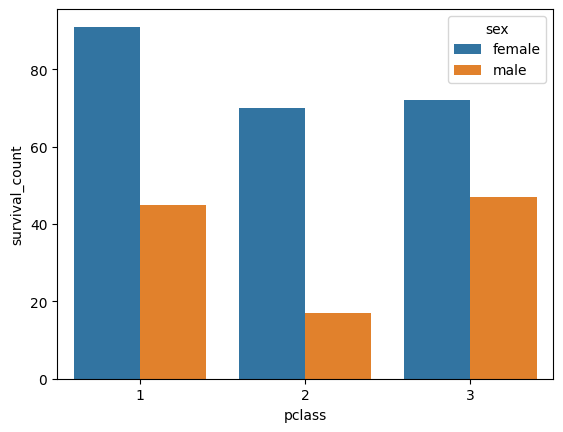

In [91]:
# 선실등급별 성별로 생존자 수를 계산
temp = df[df['survived']==1].groupby(['pclass', 'sex']).size().reset_index(name='survival_count')
sns.barplot(data=temp,x='pclass',y='survival_count',hue='sex')

In [95]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [116]:
df.isna().mean()  # age, embarked,embark_town
X = df.drop(['survived','class','embarked','who','adult_male','deck','embark_town','alive','alone'], axis=1)
y = df['survived']
X.head(2)

,pclass,sex,age,sibsp,parch,fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833


In [108]:
# 범주형 데이터 수치형 데이터 혼재
numeric_feature = X.describe().columns

In [121]:
categorical_feature = X.describe(include='object').columns
categorical_feature

Index(['sex'], dtype='object')

In [125]:
# 결측값은 평균으로 채우기, 표준화
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # 결측값을 평균으로 채우기
    ('scaler', StandardScaler())  # 표준화
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # 결측값을 최빈값으로 채우기
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # 원핫인코딩
])
# 위의 두 단계를 통합
preprocesstor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_feature),
        ('cat', categorical_transformer, categorical_feature)
    ])
# 모델 학습라인 파이프 라인
model_pipeline = Pipeline(steps=[('preprocessor', preprocesstor),
                                 ('classifier', RandomForestClassifier())])

X_train,X_test,y_train,y_test =  train_test_split(X, y, test_size=0.2, random_state=42)
# 학습
model_pipeline.fit(X_train, y_train)
# 검증
y_pred = model_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7988826815642458

In [126]:
y_pred = model_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

